# 线性SVM分类
- 在“街道以外”的地方增加更多实例不会对决策边界产生影响，也就是说它完全由位于街道边缘的实例所决定。
- SVM对特征的缩放非常敏感。
## 软间隔
- 如果我们让所有实例都不在街道上，且位于正确的一边，这就是硬间隔分类。
- 尽可能的保持街道宽阔和限制间隔违例之间找到平衡，这就是软间隔。
- SVM中C是一个超参数。C越大街道间隔越大。如果SVM过拟合，可以尝试降低C来对其正则化。

In [1]:
# 使用C=1的LinearSVC类和hinge损失函数
import numpy as np
from sklearn.datasets import load_iris
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [2]:
iris=load_iris()
X=iris.data[:,(2,3)] # petal length,petal width
y=(iris["target"]==2).astype(np.float64)

In [3]:
svm_clf=Pipeline([("scaler",StandardScaler()),("linear_svc",LinearSVC(C=1,loss="hinge"))])
svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [4]:
svm_clf.predict([[5.5,1.7]])

array([1.])

与Logistic分类器不同，SVM分类器不会输出每个类的概率。

还可以将SVC类和线性内核一起使用SVC(kernel='linear',C=1)，而不使用LinearSVC类。或者我们可以使用SGDClassifier(loss='hinge',alpha=1/(m*C))

LinearSVC类会对偏置进行正则化，所以要先前去平均值使得训练集几种。Standardscaler会自动进行这一步。此外要确保超参数loss='hinge'，这不是默认值。除非特征数量比训练实例还多，为了更好的性能dual=Flase。

# 非线性SVM分类
处理非线性可分的数据集的方法之一是添加更多特征，比如多项式特征。某些情况下，这可能导致线性可分。

In [5]:
# 我们在卫星数据上进行如上想法的测试
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [6]:
X,y=make_moons(n_samples=100,noise=0.15)
# 做两个交错的半圆

In [7]:
import matplotlib.pyplot as plt

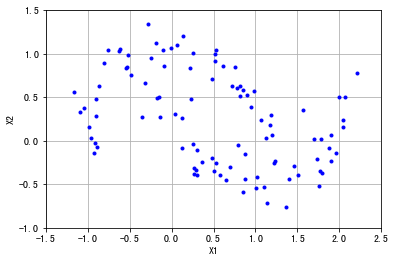

In [8]:
plt.plot(X[:,0],X[:,1],'b.')
plt.grid()
plt.xlim((-1.5,2.5))
plt.ylim((-1.0,1.5))
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

In [9]:
polynomial_svm_clf = Pipeline([("poly_features", PolynomialFeatures(
    degree=3)), ("scaler", StandardScaler()), ("svm_clf", LinearSVC(C=10, loss='hinge'))])
polynomial_svm_clf.fit(X, y)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge'))])

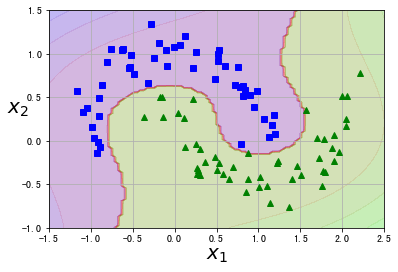

In [10]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

plt.show()

## 多项式内核
SVM中具有多项式核方法。它产生的结果就跟添加了许许多多多项式特征（甚至非常高阶的多项式特征）一样，但实际并不需要真的添加。

In [11]:
from sklearn.svm import SVC
poly_kernel_svm_clf=Pipeline([("scaler",StandardScaler()),("svm_clf",SVC(kernel='poly',degree=3,coef0=1,C=5))])
poly_kernel_svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

coef0控制的是模型受高阶多项式还是低阶多项式的影响程度。如果阶数过高导致过拟合，可以尝试降低阶数。

## 计算复杂度
![jupyter](./complex-1.jpg)
![jupyter](./complex-2.jpg)

## 相似特征
解决非线性问题的另一种技术是添加相似特征，这些特征经过相似函数计算得出，相似函数可以测量每个实例与一个特定地标之间的相似度。例子可以看书。

## 高斯RBF内核
![jupyter](./RBF.png)
y在书中为l，意思为另一个地标，||x-y||为两个点的距离。

高斯核方法也像添加了许多相似特征一样，实际上并未添加。其实所有的核方法都是这个原理。

In [12]:
rbf_kernel_svm_clf=Pipeline([("scaler",StandardScaler()),("svm_clf",SVC(kernel='rbf',gamma=5,C=0.001))])
rbf_kernel_svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

见书上图γ的对比。增加γ值会使钟形曲线变得更窄，因此每个实例的影响范围随之变小，决策边界变得更不规则，开始围着单个实例绕弯。γ就像一个正则化超参数，模型过拟合就降低，欠拟合就提高。

选择核函数的时候推荐从线性核开始尝试(linearSVC比SVC(kernel='linear')要快),之后再尝试高斯核等等。推荐使用交叉验证和网格搜索来测试不同的核函数。

# SVM回归
SVM回归要做的是尽可能多的实例位于街道上，同时限制间隔违例(也就是不在街道上的实例)。街道宽度由ε控制。ε越大间隔越大，反之越小。

In [13]:
from sklearn.svm import LinearSVR
svm_reg=Pipeline([("scaler",StandardScaler()),('svm_regression',LinearSVR(epsilon=1.5))])
svm_reg.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_regression', LinearSVR(epsilon=1.5))])

要解决非线性回归任务，可以使用核化的SVM模型。

In [14]:
from sklearn.svm import SVR
svm_poly_reg=Pipeline([('scaler',StandardScaler()),('svm_poly_regression',SVR(kernel='poly',degree=2,C=100,epsilon=0.1))])
svm_poly_reg.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_poly_regression', SVR(C=100, degree=2, kernel='poly'))])

# 工作原理

软间隔线性SVM分类器目标
![jupyter](./SVM.png)